In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
datafile=('C:/Users/valer/Documents/cancerprovertyrace.xlsx')

In [17]:
df=pd.read_excel(datafile)
print (df)

      Unnamed: 0  Cancer_id                         Name  \
0            107      27010                 Cervix Uteri   
1            108      27010                 Cervix Uteri   
2            109      27010                 Cervix Uteri   
3            110      27020                 Corpus Uteri   
4            111      27020                 Corpus Uteri   
...          ...        ...                          ...   
1070        9824      27060                        Vulva   
1071        9825      27070  Other Female Genital Organs   
1072        9826      27070  Other Female Genital Organs   
1073        9827      27070  Other Female Genital Organs   
1074        9828      27070  Other Female Genital Organs   

                   Category State_name                         Race_name  \
0     Female Genital System    Alabama  American Indian or Alaska Native   
1     Female Genital System    Alabama         Black or African American   
2     Female Genital System    Alabama             

In [26]:
print (df.columns)
pop=df['Percentage population below poverty']
pop_str=str(pop)
print(pop_str)

Index(['Unnamed: 0', 'Cancer_id', 'Name', 'Category', 'State_name',
       'Race_name', 'Count', 'Percentage population below poverty',
       'Percentage population insured', 'Population'],
      dtype='object')
0       18.4
1       18.4
2       18.4
3       18.4
4       18.4
        ... 
1070    11.6
1071    11.6
1072    11.6
1073    11.6
1074    11.6
Name: Percentage population below poverty, Length: 1075, dtype: float64


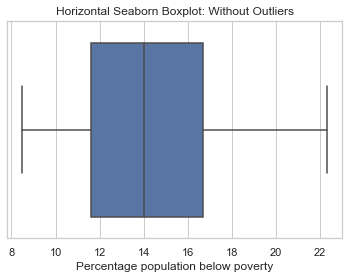

In [6]:
sns.set_theme(style="whitegrid")
plt.title('Horizontal Seaborn Boxplot: Without Outliers')
ax = sns.boxplot(x=df['Percentage population below poverty'])

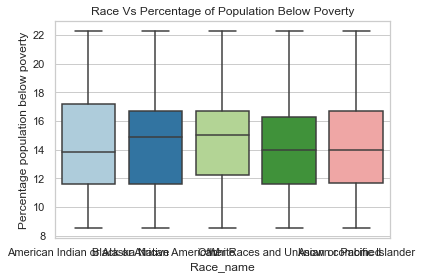

In [7]:
sns.set_palette("Paired")
ax = sns.boxplot(x="Race_name", y ="Percentage population below poverty",data = df)
plt.title('Race Vs Percentage of Population Below Poverty')
plt.show()

Text(0.5, 1.0, 'Race Vs Percentage of Population Below Poverty')

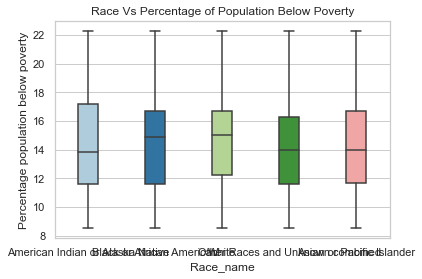

In [8]:
sns.boxplot( x=df["Race_name"], y=df["Percentage population below poverty"], width=0.3);
plt.title('Race Vs Percentage of Population Below Poverty')


In [31]:
unique_cancer_name = list(df['Cancer_id'].unique())
print (unique_cancer_name)

[27010, 27020, 27030, 27040, 27050, 27060, 27070]


In [37]:
sample_cancer_name = random.sample(unique_cancer_name, 5)

In [38]:
random.seed(30)

In [39]:
sample_cancer_name = df[df['Cancer_id'].isin(sample_cancer_name)].reset_index(drop=True)

In [42]:
sample_cancer_name = sample_cancer_name[['Race_name', 'Percentage population below poverty']]

In [43]:
groups = sample_cancer_name.groupby('Race_name').count().reset_index()

In [44]:
groups

,Race_name,Percentage population below poverty
0,American Indian or Alaska Native,148
1,Asian or Pacific Islander,123
2,Black or African American,153
3,Other Races and Unknown combined,124
4,White,205


In [45]:
unique_Race_name = sample_cancer_name['Race_name'].unique()

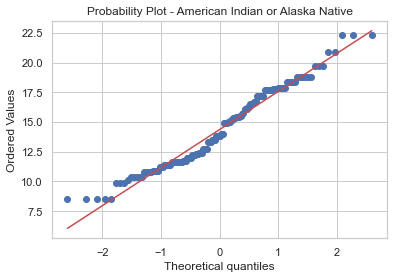

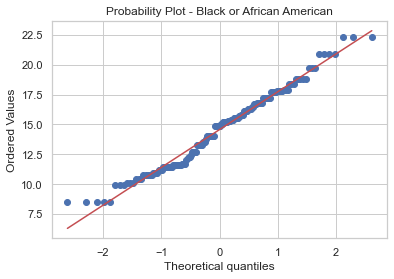

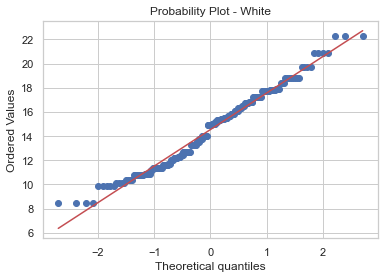

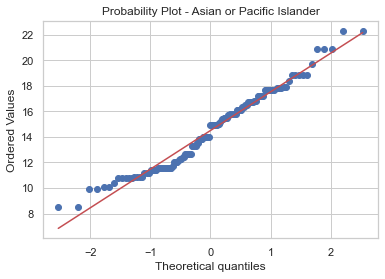

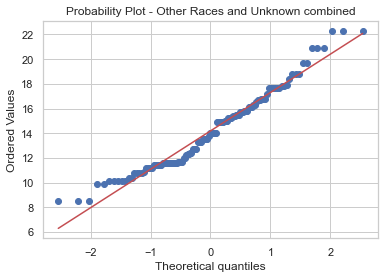

In [48]:
for Race_name in unique_Race_name:
    stats.probplot(sample_cancer_name[sample_cancer_name['Race_name'] == Race_name]['Percentage population below poverty'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  Race_name)
    plt.show()

In [49]:
ratio = sample_cancer_name.groupby('Race_name').std().max() / sample_cancer_name.groupby('Race_name').std().min()

In [50]:
ratio

Percentage population below poverty    1.065329
dtype: float64

In [51]:
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 

In [52]:
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 

In [53]:
anova_table.set_index('Source of Variation', inplace = True)

In [54]:
x_bar = sample_cancer_name['Percentage population below poverty'].mean()

In [55]:
SSTR = sample_cancer_name.groupby('Race_name').count() * (sample_cancer_name.groupby('Race_name').mean() - x_bar)**2

In [56]:
anova_table['SS']['Between Groups'] = SSTR['Percentage population below poverty'].sum()

In [57]:
SSE = (sample_cancer_name.groupby('Race_name').count() - 1) * sample_cancer_name.groupby('Race_name').std()**2

In [58]:
anova_table['SS']['Within Groups'] = SSE['Percentage population below poverty'].sum()

In [59]:
SSTR = SSTR['Percentage population below poverty'].sum() + SSE['Percentage population below poverty'].sum()

In [60]:
anova_table['SS']['Total'] = SSTR

In [62]:
anova_table['df']['Between Groups'] = sample_cancer_name['Race_name'].nunique() - 1

In [64]:
anova_table['df']['Within Groups'] = sample_cancer_name.shape[0] - sample_cancer_name['Race_name'].nunique()

In [65]:
anova_table['df']['Total'] = sample_cancer_name.shape[0] - 1

In [66]:
anova_table['MS'] = anova_table['SS'] / anova_table['df']

In [67]:
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']

In [68]:
anova_table['F']['Between Groups'] = F

In [69]:
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])


In [70]:
alpha = 0.05


In [78]:
tail_hypothesis_type = "one-tailed"


In [82]:
if tail_hypothesis_type == "one-tailed":
    alpha /= 1

In [83]:
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])


In [84]:
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,13.908768,4,3.477192,0.360272,0.836929,3.213511
Within Groups,7219.372533,748,9.651568,,,
Total,7233.281301,752,9.618725,,,


In [77]:
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")

Approach 1: The p-value approach to hypothesis testing in the decision rule


In [92]:
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."

In [90]:
conclusion = "Null Hypothesis is rejected."

In [87]:
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    


F-score is: 0.36027226708143795  and p value is: 0.8369289454301568


In [93]:
print(conclusion)

Null Hypothesis is rejected.


In [94]:
print("\n--------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------


In [95]:
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")


Approach 2: The critical value approach to hypothesis testing in the decision rule


In [96]:
conclusion = "Failed to reject the null hypothesis."

In [97]:
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."

In [98]:
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])


F-score is: 0.36027226708143795  and critical value is: 3.2135111693491103


In [99]:
print(conclusion)

Failed to reject the null hypothesis.
